# Design the first stage for week 2
## Constraints
- Gm = 0.15mS, Rout = 2Mohms
- Vin_cm range >= 0.35V
## Design
- Telescopic Amps
- with 2 inputs and one 
- I use VDDH = 1.8V for my first attempt

# Import critical files and libraries

In [141]:
# Always run this section first
import numpy as np
import matplotlib.pyplot as plt
from look_up import *
nch_2v = importdata("nch_2v.mat")
pch_2v = importdata("pch_2v.mat")
nch_1v = importdata("nch_1v.mat")
pch_1v = importdata("pch_1v.mat")

# Find some useful parameters for mos1v and mos2v
- Vth
- unCox and upCox
- lamda
- gamma

In [142]:
# Find the Vth_0 for nch and pch under different length(VSB = 0) 1v
L_set = nch_1v["L"]
VDS_set = nch_1v["VDS"]
VGS_set = nch_1v["VGS"]
VSB = 0
print(nch_1v["L"])
print(nch_2v["L"])
print(nch_1v["VDS"])
print(nch_2v["VDS"])
def find_Vth_0(L, device): # device is nch_1v or pch_1v or nch_2v or pch_2v
    Vth_0_set = []
    for i in range(len(VDS_set)):
        ID_set = []
        VDS = VDS_set[i]
        for k in range(len(VGS_set)):
            VGS = VGS_set[k]
            ID_set.append(look_up_basic(device, 'ID', vgs=VGS, vds=VDS, vsb=VSB, l=L))

        for j in range(len(ID_set)):
            if(ID_set[j] >= 1e-6):
                Vth_0_set.append(VGS_set[j])
                break

    return Vth_0_set

Vth_0_nch_1v = find_Vth_0(L = 0.36, device = nch_1v)
Vth_0_pch_1v = find_Vth_0(L = 0.36, device = pch_1v)

print("Vth_0_nch_1v: ", Vth_0_nch_1v)
print("Vth_0_pch_1v: ", Vth_0_pch_1v)



[ 0.05   0.055  0.06   0.08   0.1    0.12   0.14   0.16   0.18   0.2
  0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.     2.     3.
  4.     5.     6.     7.     8.     9.    10.   ]
[ 0.15  0.16  0.17  0.18  0.19  0.2   0.25  0.3   0.35  0.4   0.45  0.5
  0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    2.    3.
  4.    5.    6.    7.    8.    9.   10.  ]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1  ]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.4

In [143]:
# Find the Vth_0 for nch and pch under different length(VSB = 0) 2v
L_set = nch_2v["L"]
VDS_set = nch_2v["VDS"]
VGS_set = nch_2v["VGS"]
VSB = 0
print(nch_1v["L"])
print(nch_2v["L"])
print(nch_1v["VDS"])
print(nch_2v["VDS"])
print(nch_1v["VGS"])
print(nch_2v["VGS"])
def find_Vth_0(L, device): # device is nch_1v or pch_1v or nch_2v or pch_2v
    Vth_0_set = []
    for i in range(len(VDS_set)):
        ID_set = []
        VDS = VDS_set[i]
        for k in range(len(VGS_set)):
            VGS = VGS_set[k]
            ID_set.append(look_up_basic(device, 'ID', vgs=VGS, vds=VDS, vsb=VSB, l=L))

        for j in range(len(ID_set)):
            if(ID_set[j] >= 1e-6):
                Vth_0_set.append(VGS_set[j])
                break

    return Vth_0_set

Vth_0_nch_2v = find_Vth_0(L = 0.36, device = nch_2v)
Vth_0_pch_2v = find_Vth_0(L = 0.36, device = pch_2v)

print("Vth_0_nch_2v: ", Vth_0_nch_2v)
print("Vth_0_pch_2v: ", Vth_0_pch_2v)



[ 0.05   0.055  0.06   0.08   0.1    0.12   0.14   0.16   0.18   0.2
  0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.     2.     3.
  4.     5.     6.     7.     8.     9.    10.   ]
[ 0.15  0.16  0.17  0.18  0.19  0.2   0.25  0.3   0.35  0.4   0.45  0.5
  0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    2.    3.
  4.    5.    6.    7.    8.    9.   10.  ]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1  ]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.4

Estimated VTH at L=0.36µm: 0.5250 V

VGS extraction range: 0.625 V to 1.800 V (48 points)
VDS saturation range: 1.100 V to 1.800 V (29 points)

Extracting λ (lambda) from I-V characteristics in saturation

Extracted λ (lambda):
  Mean: 0.1123 V⁻¹
  Std:  0.0260 V⁻¹

Extracting μn·Cox from square-law saturation model

Extracted μn·Cox:
  Mean: 2.4286e-04 A/V²
  Std:  1.0060e-04 A/V²

Reconstructing I-V characteristics using extracted parameters


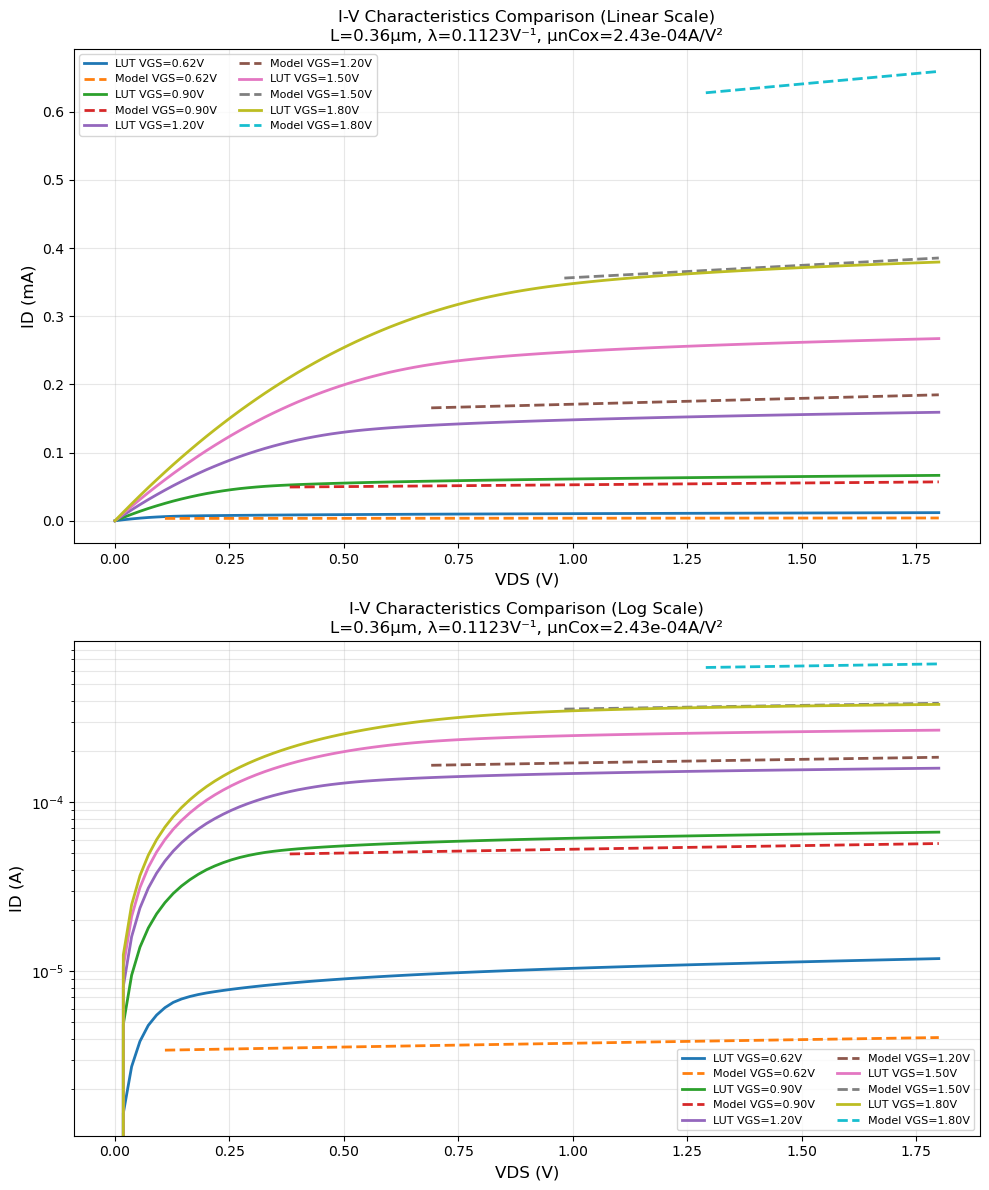


EXTRACTION SUMMARY
Device: nch_2v
Channel Length L = 0.36 µm
Source-Bulk Voltage VSB = 0.0 V
Device Width W = 1.0 µm

Approximate VTH: 0.5250 V

Channel-length modulation parameter λ:
  Mean:   0.112321 V⁻¹
  Std:    0.025982 V⁻¹

Process transconductance parameter μn·Cox:
  Mean:   2.4286e-04 A/V²
  Std:    1.0060e-04 A/V²
  (μF/cm²): 24286.23 µF/cm²


In [144]:
# ============================================================================
# Extraction of λ (lambda) and μn·Cox from nch_2v gm/Id lookup table
# ============================================================================
# Goal: Extract channel-length modulation parameter λ and effective μn·Cox
# at L = 0.36 µm, then reconstruct and compare I-V characteristics.
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from look_up import importdata

# ----------------------------------------------------------------------------
# 1. Load the nch_2v lookup table
# ----------------------------------------------------------------------------
# TODO: Replace with actual filename if different
nch_2v_data = nch_2v  # Assuming nch_2v is already loaded in the notebook

# ----------------------------------------------------------------------------
# 2. Fixed parameters
# ----------------------------------------------------------------------------
L_target = 0.36  # µm
VSB = 0.0        # V
W = 1.0          # µm (LUT assumes W=1µm)

# ----------------------------------------------------------------------------
# 3. Helper function: Estimate VTH at given L
# ----------------------------------------------------------------------------
def estimate_vth(device_data, L, vsb=0.0, vds_low=0.05, id_threshold=1e-6):
    """
    Estimate threshold voltage VTH by finding VGS where ID crosses id_threshold
    at a low VDS (linear region approximation).
    
    Parameters:
    - device_data: LUT dictionary
    - L: channel length (µm)
    - vsb: source-bulk voltage (V)
    - vds_low: small VDS for threshold detection (V)
    - id_threshold: current threshold for VTH detection (A)
    
    Returns:
    - vth_estimate: estimated threshold voltage (V)
    """
    vgs_sweep = device_data['VGS']
    
    for vgs in vgs_sweep:
        id_val = look_up_basic(device_data, 'ID', vgs=vgs, vds=vds_low, vsb=vsb, l=L)
        if id_val >= id_threshold:
            return vgs
    
    # If not found, return first VGS (fallback)
    return vgs_sweep[0]

# ----------------------------------------------------------------------------
# 4. Estimate VTH for nch_2v at L = 0.36 µm
# ----------------------------------------------------------------------------
VTH_approx = estimate_vth(nch_2v_data, L=L_target, vsb=VSB, vds_low=0.05, id_threshold=1e-6)
print(f"Estimated VTH at L={L_target}µm: {VTH_approx:.4f} V")

# ----------------------------------------------------------------------------
# 5. Choose VGS and VDS ranges for extraction
# ----------------------------------------------------------------------------
# VGS range: strong inversion (VTH + margin to max available)
vgs_all = nch_2v_data['VGS']
vgs_min = VTH_approx + 0.1  # Start 100mV above VTH
vgs_max = np.max(vgs_all)
vgs_extraction = vgs_all[(vgs_all >= vgs_min) & (vgs_all <= vgs_max)]

# VDS range: saturation region (use upper portion of available VDS)
vds_all = nch_2v_data['VDS']
vds_sat_threshold = 0.6 * np.max(vds_all)  # Use top 40% for saturation
vds_saturation = vds_all[vds_all >= vds_sat_threshold]

print(f"\nVGS extraction range: {vgs_extraction[0]:.3f} V to {vgs_extraction[-1]:.3f} V ({len(vgs_extraction)} points)")
print(f"VDS saturation range: {vds_saturation[0]:.3f} V to {vds_saturation[-1]:.3f} V ({len(vds_saturation)} points)")

# ----------------------------------------------------------------------------
# 6. Extract λ (lambda) for each VGS
# ----------------------------------------------------------------------------
lambda_values = []
id0_values = []
vov_values = []

print("\n" + "="*70)
print("Extracting λ (lambda) from I-V characteristics in saturation")
print("="*70)

for vgs in vgs_extraction:
    # Sample ID vs VDS at this VGS in saturation
    id_sat = []
    for vds in vds_saturation:
        id_val = look_up_basic(nch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
        id_sat.append(id_val)
    
    id_sat = np.array(id_sat)
    
    # Linear fit: ID = a*VDS + b
    # ID = ID0*(1 + λ*VDS) = ID0 + ID0*λ*VDS
    # So: a = ID0*λ, b = ID0, therefore λ = a/b
    coeffs = np.polyfit(vds_saturation, id_sat, 1)
    a = coeffs[0]  # slope
    b = coeffs[1]  # intercept
    
    if b > 0:
        lambda_val = a / b
        lambda_values.append(lambda_val)
        id0_values.append(b)
        vov = vgs - VTH_approx
        vov_values.append(vov)

lambda_values = np.array(lambda_values)
id0_values = np.array(id0_values)
vov_values = np.array(vov_values)

lambda_mean = np.mean(lambda_values)
lambda_std = np.std(lambda_values)

print(f"\nExtracted λ (lambda):")
print(f"  Mean: {lambda_mean:.4f} V⁻¹")
print(f"  Std:  {lambda_std:.4f} V⁻¹")

# ----------------------------------------------------------------------------
# 7. Extract μn·Cox using square-law relation
# ----------------------------------------------------------------------------
# ID0 ≈ (1/2) * μn*Cox * (W/L) * VOV²
# μn*Cox ≈ 2 * ID0 * L / (W * VOV²)

muCox_values = []

print("\n" + "="*70)
print("Extracting μn·Cox from square-law saturation model")
print("="*70)

for i, (id0, vov) in enumerate(zip(id0_values, vov_values)):
    if vov > 0:
        muCox = (2 * id0 * L_target) / (W * vov**2)
        muCox_values.append(muCox)

muCox_values = np.array(muCox_values)
muCox_mean = np.mean(muCox_values)
muCox_std = np.std(muCox_values)

print(f"\nExtracted μn·Cox:")
print(f"  Mean: {muCox_mean:.4e} A/V²")
print(f"  Std:  {muCox_std:.4e} A/V²")

# ----------------------------------------------------------------------------
# 8. Reconstruct I-V characteristics and compare with LUT
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("Reconstructing I-V characteristics using extracted parameters")
print("="*70)

# Select representative VGS values for plotting (3-5 points)
num_plot_points = 5
vgs_plot_indices = np.linspace(0, len(vgs_extraction)-1, num_plot_points, dtype=int)
vgs_plot = vgs_extraction[vgs_plot_indices]

# VDS sweep for plotting (full range)
vds_plot = np.linspace(0, np.max(vds_all), 100)

# Model function
def id_model(vgs, vds, vth, lambda_val, muCox, W, L):
    """
    Square-law saturation model with channel-length modulation:
    ID = (1/2) * μn*Cox * (W/L) * VOV² * (1 + λ*VDS)
    Only valid in saturation: VDS >= VOV
    """
    vov = vgs - vth
    if vov <= 0:
        return np.zeros_like(vds)
    
    id_sat = 0.5 * muCox * (W / L) * vov**2 * (1 + lambda_val * vds)
    
    # Apply saturation condition: only for VDS >= VOV
    id_result = np.where(vds >= vov, id_sat, np.nan)
    return id_result

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Linear scale
ax1 = axes[0]
for vgs in vgs_plot:
    # LUT data
    id_lut = []
    for vds in vds_plot:
        id_val = look_up_basic(nch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
        id_lut.append(id_val)
    id_lut = np.array(id_lut)
    
    # Model data
    id_mod = id_model(vgs, vds_plot, VTH_approx, lambda_mean, muCox_mean, W, L_target)
    
    # Plot
    ax1.plot(vds_plot, id_lut * 1e3, '-', linewidth=2, label=f'LUT VGS={vgs:.2f}V')
    ax1.plot(vds_plot, id_mod * 1e3, '--', linewidth=2, label=f'Model VGS={vgs:.2f}V')

ax1.set_xlabel('VDS (V)', fontsize=12)
ax1.set_ylabel('ID (mA)', fontsize=12)
ax1.set_title(f'I-V Characteristics Comparison (Linear Scale)\nL={L_target}µm, λ={lambda_mean:.4f}V⁻¹, μnCox={muCox_mean:.2e}A/V²', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8, ncol=2)

# Plot 2: Log scale
ax2 = axes[1]
for vgs in vgs_plot:
    # LUT data
    id_lut = []
    for vds in vds_plot:
        id_val = look_up_basic(nch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
        id_lut.append(id_val)
    id_lut = np.array(id_lut)
    
    # Model data
    id_mod = id_model(vgs, vds_plot, VTH_approx, lambda_mean, muCox_mean, W, L_target)
    
    # Plot
    ax2.semilogy(vds_plot, id_lut, '-', linewidth=2, label=f'LUT VGS={vgs:.2f}V')
    ax2.semilogy(vds_plot, id_mod, '--', linewidth=2, label=f'Model VGS={vgs:.2f}V')

ax2.set_xlabel('VDS (V)', fontsize=12)
ax2.set_ylabel('ID (A)', fontsize=12)
ax2.set_title(f'I-V Characteristics Comparison (Log Scale)\nL={L_target}µm, λ={lambda_mean:.4f}V⁻¹, μnCox={muCox_mean:.2e}A/V²', fontsize=12)
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 9. Summary output
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("EXTRACTION SUMMARY")
print("="*70)
print(f"Device: nch_2v")
print(f"Channel Length L = {L_target} µm")
print(f"Source-Bulk Voltage VSB = {VSB} V")
print(f"Device Width W = {W} µm")
print(f"\nApproximate VTH: {VTH_approx:.4f} V")
print(f"\nChannel-length modulation parameter λ:")
print(f"  Mean:   {lambda_mean:.6f} V⁻¹")
print(f"  Std:    {lambda_std:.6f} V⁻¹")
print(f"\nProcess transconductance parameter μn·Cox:")
print(f"  Mean:   {muCox_mean:.4e} A/V²")
print(f"  Std:    {muCox_std:.4e} A/V²")
print(f"  (μF/cm²): {muCox_mean * 1e8:.2f} µF/cm²")
print("="*70)

    



Estimated VTH for pch_2v at L=0.36µm: 0.5000 V
VGS extraction range: 0.600 V to 1.100 V
Number of VGS points: 8

LAMBDA EXTRACTION
VGS=0.600V, VOV=0.100V: λ=0.386048 V⁻¹, ID0=5.9170e-06 A
VGS=0.671V, VOV=0.171V: λ=0.302094 V⁻¹, ID0=1.2057e-05 A
VGS=0.743V, VOV=0.243V: λ=0.255659 V⁻¹, ID0=1.9563e-05 A
VGS=0.814V, VOV=0.314V: λ=0.226392 V⁻¹, ID0=2.7988e-05 A
VGS=0.886V, VOV=0.386V: λ=0.206290 V⁻¹, ID0=3.7098e-05 A
VGS=0.957V, VOV=0.457V: λ=0.191682 V⁻¹, ID0=4.6732e-05 A
VGS=1.029V, VOV=0.529V: λ=0.180654 V⁻¹, ID0=5.6759e-05 A
VGS=1.100V, VOV=0.600V: λ=0.172276 V⁻¹, ID0=6.7053e-05 A

Lambda statistics:
  Mean: 0.240137 V⁻¹
  Std:  0.068187 V⁻¹

MU_P*COX EXTRACTION
VOV=0.100V: μp·Cox=4.2602e-04 A/V²
VOV=0.171V: μp·Cox=2.9539e-04 A/V²
VOV=0.243V: μp·Cox=2.3881e-04 A/V²
VOV=0.314V: μp·Cox=2.0401e-04 A/V²
VOV=0.386V: μp·Cox=1.7954e-04 A/V²
VOV=0.457V: μp·Cox=1.6101e-04 A/V²
VOV=0.529V: μp·Cox=1.4627e-04 A/V²
VOV=0.600V: μp·Cox=1.3411e-04 A/V²

μp·Cox statistics:
  Mean: 2.2315e-04 A/V²
  Std

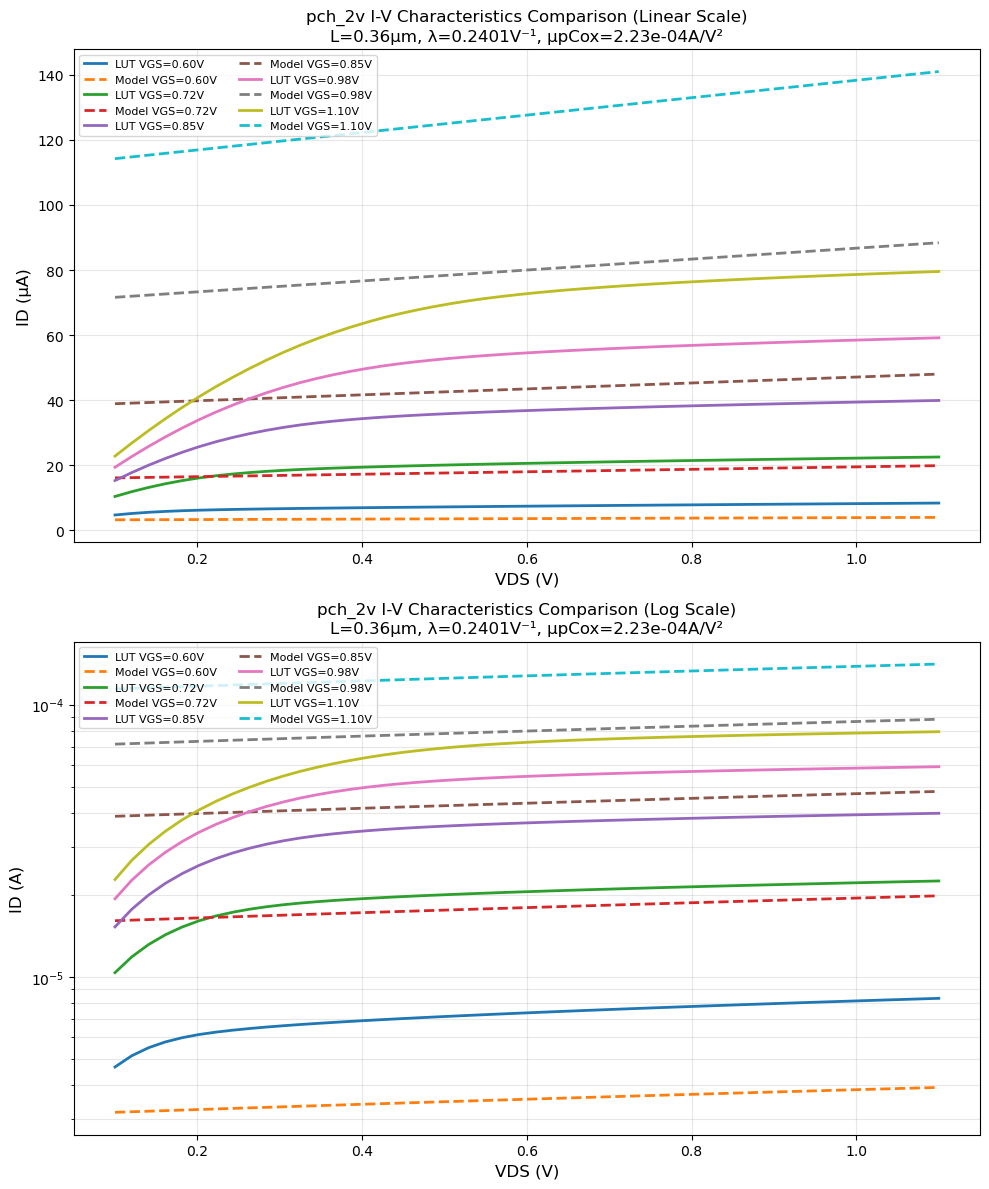


PMOS EXTRACTION SUMMARY
Device: pch_2v
Channel Length L = 0.36 µm
Source-Bulk Voltage VSB = 0.0 V
Device Width W = 1.0 µm

Approximate VTH: 0.5000 V

Channel-length modulation parameter λ:
  Mean:   0.240137 V⁻¹
  Std:    0.068187 V⁻¹

Process transconductance parameter μp·Cox:
  Mean:   2.2315e-04 A/V²
  Std:    9.1235e-05 A/V²
  (µF/cm²): 22314.52 µF/cm²


In [145]:
# ----------------------------------------------------------------------------
# PMOS (pch_2v) Parameter Extraction and Model Validation
# ----------------------------------------------------------------------------
# This script extracts lambda and mu_p*Cox from the pch_2v lookup table
# at L = 0.36 µm and validates the extracted parameters by comparing
# the reconstructed I-V characteristics with the original LUT data.
# ----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from look_up import importdata, look_up_basic

# ----------------------------------------------------------------------------
# 1. Load pch_2v LUT data
# ----------------------------------------------------------------------------
# TODO: Update filename if needed
pch_2v_data = importdata("pch_2v.mat")

# ----------------------------------------------------------------------------
# 2. Device parameters and bias ranges
# ----------------------------------------------------------------------------
L_target = 0.36  # µm - critical parameter
VSB = 0.0        # V - source-bulk voltage
W = 1.0          # µm - assumed width (LUT normalized to W=1µm)

# Get the available VGS and VDS ranges from the LUT
vgs_available = pch_2v_data['VGS']
vds_available = pch_2v_data['VDS']

# ----------------------------------------------------------------------------
# 3. Estimate VTH for pch_2v at L = 0.36 µm
# ----------------------------------------------------------------------------
def estimate_vth_pmos(data_dict, l, vsb=0.0, vds_test=0.1, id_threshold=1e-6, w=1.0):
    """
    Estimate VTH by finding VGS where ID crosses a threshold current.
    For pch_2v, all values are already absolute, so we treat them as positive.
    """
    vgs_sweep = np.linspace(0.1, 1.2, 100)
    id_vals = []
    
    for vgs in vgs_sweep:
        try:
            id_val = look_up_basic(data_dict, 'ID', vgs=vgs, vds=vds_test, vsb=vsb, l=l)
            id_vals.append(id_val)
        except:
            id_vals.append(np.nan)
    
    id_vals = np.array(id_vals)
    valid_mask = ~np.isnan(id_vals)
    
    if np.sum(valid_mask) < 2:
        return 0.4  # default fallback
    
    # Find where ID crosses threshold
    vgs_valid = vgs_sweep[valid_mask]
    id_valid = id_vals[valid_mask]
    
    # Interpolate to find VTH
    if np.max(id_valid) > id_threshold:
        idx = np.where(id_valid > id_threshold)[0]
        if len(idx) > 0:
            return vgs_valid[idx[0]]
    
    return 0.4  # default fallback

VTH_approx = estimate_vth_pmos(pch_2v_data, L_target, vsb=VSB)
print(f"\nEstimated VTH for pch_2v at L={L_target}µm: {VTH_approx:.4f} V")

# ----------------------------------------------------------------------------
# 4. Choose VGS range for extraction (strong inversion)
# ----------------------------------------------------------------------------
# Select VGS values well above VTH for strong inversion
vgs_min = VTH_approx + 0.1  # at least 100mV overdrive
vgs_max = min(1.1, np.max(vgs_available))  # don't exceed available range
vgs_extract = np.linspace(vgs_min, vgs_max, 8)

print(f"VGS extraction range: {vgs_min:.3f} V to {vgs_max:.3f} V")
print(f"Number of VGS points: {len(vgs_extract)}")

# ----------------------------------------------------------------------------
# 5. Extract lambda (channel-length modulation parameter)
# ----------------------------------------------------------------------------
lambda_values = []
id0_values = []
vov_values = []

print("\n" + "="*70)
print("LAMBDA EXTRACTION")
print("="*70)

for vgs in vgs_extract:
    vov = vgs - VTH_approx
    
    # Define saturation region: VDS >= VOV + margin
    vds_sat_min = vov + 0.1  # 100mV margin
    vds_sat_max = min(1.1, np.max(vds_available))
    
    # Sample VDS in saturation region
    vds_sat = np.linspace(vds_sat_min, vds_sat_max, 20)
    id_sat = []
    
    for vds in vds_sat:
        try:
            id_val = look_up_basic(pch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
            id_sat.append(id_val)
        except:
            id_sat.append(np.nan)
    
    id_sat = np.array(id_sat)
    valid_mask = ~np.isnan(id_sat)
    
    if np.sum(valid_mask) < 3:
        continue
    
    vds_valid = vds_sat[valid_mask]
    id_valid = id_sat[valid_mask]
    
    # Linear fit: ID = a*VDS + b
    # ID = ID0*(1 + lambda*VDS) = ID0 + ID0*lambda*VDS
    # So: a = ID0*lambda, b = ID0
    # Therefore: lambda = a/b
    coeffs = np.polyfit(vds_valid, id_valid, 1)
    a = coeffs[0]  # slope
    b = coeffs[1]  # intercept (ID0)
    
    if b > 0:
        lambda_val = a / b
        lambda_values.append(lambda_val)
        id0_values.append(b)
        vov_values.append(vov)
        print(f"VGS={vgs:.3f}V, VOV={vov:.3f}V: λ={lambda_val:.6f} V⁻¹, ID0={b:.4e} A")

lambda_values = np.array(lambda_values)
id0_values = np.array(id0_values)
vov_values = np.array(vov_values)

lambda_mean = np.mean(lambda_values)
lambda_std = np.std(lambda_values)

print(f"\nLambda statistics:")
print(f"  Mean: {lambda_mean:.6f} V⁻¹")
print(f"  Std:  {lambda_std:.6f} V⁻¹")

# ----------------------------------------------------------------------------
# 6. Extract mu_p*Cox using square-law relation
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("MU_P*COX EXTRACTION")
print("="*70)

muCox_values = []

for i in range(len(id0_values)):
    id0 = id0_values[i]
    vov = vov_values[i]
    
    # ID0 = 0.5 * mu_p*Cox * (W/L) * VOV^2
    # mu_p*Cox = 2 * ID0 * L / (W * VOV^2)
    if vov > 0:
        muCox = 2 * id0 * L_target / (W * vov**2)
        muCox_values.append(muCox)
        print(f"VOV={vov:.3f}V: μp·Cox={muCox:.4e} A/V²")

muCox_values = np.array(muCox_values)
muCox_mean = np.mean(muCox_values)
muCox_std = np.std(muCox_values)

print(f"\nμp·Cox statistics:")
print(f"  Mean: {muCox_mean:.4e} A/V²")
print(f"  Std:  {muCox_std:.4e} A/V²")
print(f"  (µF/cm²): {muCox_mean * 1e8:.2f} µF/cm²")

# ----------------------------------------------------------------------------
# 7. Model function for ID
# ----------------------------------------------------------------------------
def id_model_pmos(vgs, vds, vth, lambda_param, muCox, w, l):
    """
    Square-law model for PMOS in saturation.
    ID = 0.5 * mu_p*Cox * (W/L) * VOV^2 * (1 + lambda*VDS)
    """
    vov = vgs - vth
    vov = np.maximum(vov, 0)  # ensure non-negative
    
    id_base = 0.5 * muCox * (w / l) * vov**2
    id_total = id_base * (1 + lambda_param * vds)
    
    return id_total

# ----------------------------------------------------------------------------
# 8. Reconstruct and compare I-V characteristics
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("PLOTTING I-V CHARACTERISTICS COMPARISON")
print("="*70)

# Select representative VGS values for plotting
vgs_plot = np.linspace(vgs_min, vgs_max, 5)
vds_plot = np.linspace(0.1, 1.1, 50)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Linear scale plot
for vgs in vgs_plot:
    vov = vgs - VTH_approx
    
    # LUT data
    id_lut = []
    for vds in vds_plot:
        try:
            id_val = look_up_basic(pch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
            id_lut.append(id_val)
        except:
            id_lut.append(np.nan)
    id_lut = np.array(id_lut)
    
    # Model data
    id_mod = id_model_pmos(vgs, vds_plot, VTH_approx, lambda_mean, muCox_mean, W, L_target)
    
    # Plot
    ax1.plot(vds_plot, id_lut * 1e6, '-', linewidth=2, label=f'LUT VGS={vgs:.2f}V')
    ax1.plot(vds_plot, id_mod * 1e6, '--', linewidth=2, label=f'Model VGS={vgs:.2f}V')

ax1.set_xlabel('VDS (V)', fontsize=12)
ax1.set_ylabel('ID (µA)', fontsize=12)
ax1.set_title(f'pch_2v I-V Characteristics Comparison (Linear Scale)\nL={L_target}µm, λ={lambda_mean:.4f}V⁻¹, μpCox={muCox_mean:.2e}A/V²', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8, ncol=2)

# Log scale plot
for vgs in vgs_plot:
    # LUT data
    id_lut = []
    for vds in vds_plot:
        try:
            id_val = look_up_basic(pch_2v_data, 'ID', vgs=vgs, vds=vds, vsb=VSB, l=L_target)
            id_lut.append(id_val)
        except:
            id_lut.append(np.nan)
    id_lut = np.array(id_lut)
    
    # Model data
    id_mod = id_model_pmos(vgs, vds_plot, VTH_approx, lambda_mean, muCox_mean, W, L_target)
    
    # Plot
    ax2.semilogy(vds_plot, id_lut, '-', linewidth=2, label=f'LUT VGS={vgs:.2f}V')
    ax2.semilogy(vds_plot, id_mod, '--', linewidth=2, label=f'Model VGS={vgs:.2f}V')

ax2.set_xlabel('VDS (V)', fontsize=12)
ax2.set_ylabel('ID (A)', fontsize=12)
ax2.set_title(f'pch_2v I-V Characteristics Comparison (Log Scale)\nL={L_target}µm, λ={lambda_mean:.4f}V⁻¹, μpCox={muCox_mean:.2e}A/V²', fontsize=12)
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 9. Summary output
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("PMOS EXTRACTION SUMMARY")
print("="*70)
print(f"Device: pch_2v")
print(f"Channel Length L = {L_target} µm")
print(f"Source-Bulk Voltage VSB = {VSB} V")
print(f"Device Width W = {W} µm")
print(f"\nApproximate VTH: {VTH_approx:.4f} V")
print(f"\nChannel-length modulation parameter λ:")
print(f"  Mean:   {lambda_mean:.6f} V⁻¹")
print(f"  Std:    {lambda_std:.6f} V⁻¹")
print(f"\nProcess transconductance parameter μp·Cox:")
print(f"  Mean:   {muCox_mean:.4e} A/V²")
print(f"  Std:    {muCox_std:.4e} A/V²")
print(f"  (µF/cm²): {muCox_mean * 1e8:.2f} µF/cm²")
print("="*70)



# basic gm*ro order of magnitude

C:\Users\Lijin Liu\AppData\Local\Temp\ipykernel_1320\1355095054.py:15: RuntimeWarning: invalid value encountered in divide
  gm_ro = gm_ID/gds_ID


gm*ro values for VGS > 0.475V
VDS (V)      VGS (V)      gm*ro       
----------------------------------------------------------------------
0.0000       0.4750       nan         
0.0000       0.5000       nan         
0.0000       0.5250       nan         
0.0000       0.5500       nan         
0.0000       0.5750       nan         
0.0000       0.6000       nan         
0.0000       0.6250       nan         
0.0000       0.6500       nan         
0.0000       0.6750       nan         
0.0000       0.7000       nan         
0.0000       0.7250       nan         
0.0000       0.7500       nan         
0.0000       0.7750       0.00        
0.0000       0.8000       nan         
0.0000       0.8250       nan         
0.0000       0.8500       nan         
0.0000       0.8750       nan         
0.0000       0.9000       nan         
0.0000       0.9250       nan         
0.0000       0.9500       nan         
0.0000       0.9750       nan         
0.0000       1.0000       nan         
0.

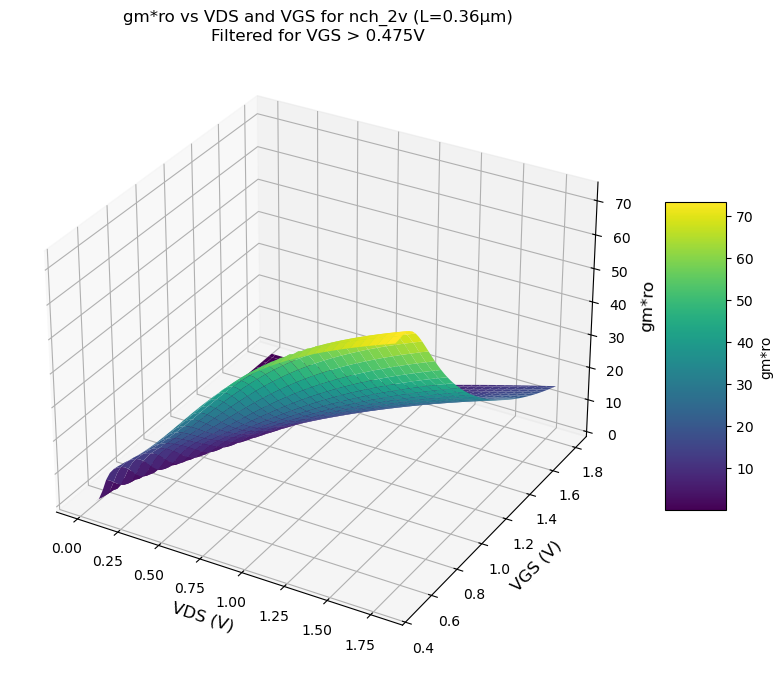

In [146]:
# find gm*ro under different VDS and VGS and plot a 3D surface
L = 0.36
VDS_set = nch_2v['VDS']
VGS_set = nch_2v['VGS']

# Initialize as 2D array with correct shape
gm_ro_set = np.zeros((len(VDS_set), len(VGS_set)))

for i in range(len(VDS_set)):
    for j in range(len(VGS_set)):
        VDS = VDS_set[i]
        VGS = VGS_set[j]
        gds_ID = look_up_basic(nch_2v, 'GDS_ID', vgs=VGS, vds=VDS, vsb=0, l=L)
        gm_ID = look_up_basic(nch_2v, 'GM_ID', vgs=VGS, vds=VDS, vsb=0, l=L)
        gm_ro = gm_ID/gds_ID
        gm_ro_set[i, j] = gm_ro


# Filter data for VGS > 0.475V
VGS_threshold = 0.475
print("="*70)
print(f"gm*ro values for VGS > {VGS_threshold}V")
print("="*70)
print(f"{'VDS (V)':<12} {'VGS (V)':<12} {'gm*ro':<12}")
print("-"*70)

count = 0
filtered_data = []
for i in range(len(VDS_set)):
    for j in range(len(VGS_set)):
        if VGS_set[j] > VGS_threshold:
            print(f"{VDS_set[i]:<12.4f} {VGS_set[j]:<12.4f} {gm_ro_set[i, j]:<12.2f}")
            filtered_data.append([VDS_set[i], VGS_set[j], gm_ro_set[i, j]])
            count += 1

print("-"*70)
print(f"Total combinations with VGS > {VGS_threshold}V: {count}")

# Get indices for filtered VGS values
vgs_mask = VGS_set > VGS_threshold
filtered_vgs_indices = np.where(vgs_mask)[0]
filtered_VGS = VGS_set[vgs_mask]

# Extract corresponding gm*ro values
filtered_gm_ro = gm_ro_set[:, vgs_mask]

print(f"VGS range: {filtered_VGS[0]:.4f}V to {filtered_VGS[-1]:.4f}V")
print(f"Max gm*ro in filtered data: {np.max(filtered_gm_ro):.2f}")
print(f"Min gm*ro in filtered data: {np.min(filtered_gm_ro):.2f}")
print("="*70)

# Create 3D plot for filtered data
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
X_filtered, Y_filtered = np.meshgrid(VDS_set, filtered_VGS)

# Transpose filtered_gm_ro to match meshgrid dimensions
surf = ax.plot_surface(X_filtered, Y_filtered, filtered_gm_ro.T, cmap='viridis')
ax.set_xlabel('VDS (V)', fontsize=12)
ax.set_ylabel('VGS (V)', fontsize=12)
ax.set_zlabel('gm*ro', fontsize=12)
ax.set_title(f'gm*ro vs VDS and VGS for nch_2v (L=0.36µm)\nFiltered for VGS > {VGS_threshold}V', fontsize=12)

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='gm*ro')
plt.show()



C:\Users\Lijin Liu\AppData\Local\Temp\ipykernel_1320\1620340297.py:15: RuntimeWarning: invalid value encountered in divide
  gm_ro = gm_ID/gds_ID


gm*ro values for pch_2v with VGS > 0.475V
VDS (V)      VGS (V)      gm*ro       
----------------------------------------------------------------------
0.0000       0.4750       nan         
0.0000       0.5000       nan         
0.0000       0.5250       nan         
0.0000       0.5500       nan         
0.0000       0.5750       nan         
0.0000       0.6000       nan         
0.0000       0.6250       nan         
0.0000       0.6500       nan         
0.0000       0.6750       nan         
0.0000       0.7000       nan         
0.0000       0.7250       nan         
0.0000       0.7500       nan         
0.0000       0.7750       nan         
0.0000       0.8000       nan         
0.0000       0.8250       nan         
0.0000       0.8500       nan         
0.0000       0.8750       nan         
0.0000       0.9000       nan         
0.0000       0.9250       nan         
0.0000       0.9500       nan         
0.0000       0.9750       nan         
0.0000       1.0000       nan

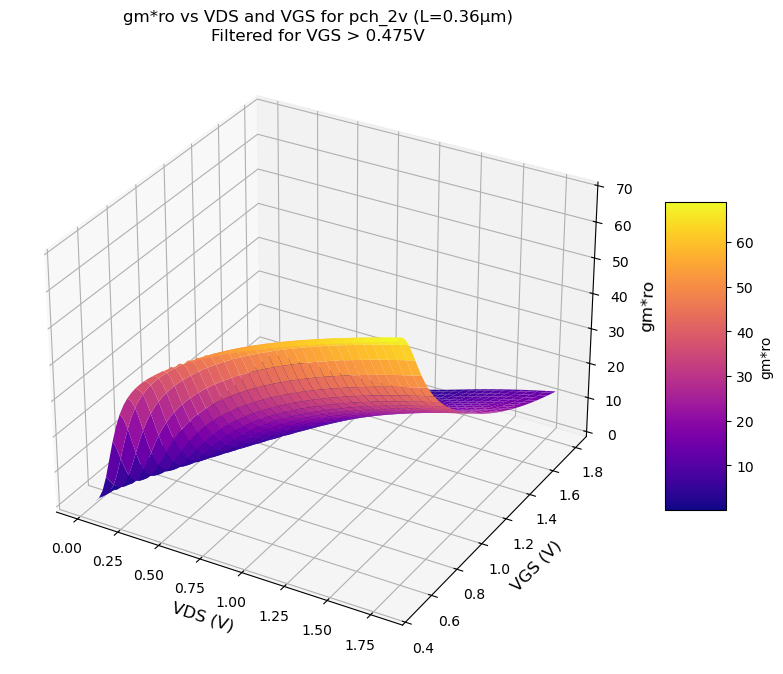

In [147]:
# find gm*ro under different VDS and VGS for pch_2v and plot a 3D surface
L = 0.36
VDS_set = pch_2v['VDS']
VGS_set = pch_2v['VGS']

# Initialize as 2D array with correct shape
gm_ro_set_pch = np.zeros((len(VDS_set), len(VGS_set)))

for i in range(len(VDS_set)):
    for j in range(len(VGS_set)):
        VDS = VDS_set[i]
        VGS = VGS_set[j]
        gds_ID = look_up_basic(pch_2v, 'GDS_ID', vgs=VGS, vds=VDS, vsb=0, l=L)
        gm_ID = look_up_basic(pch_2v, 'GM_ID', vgs=VGS, vds=VDS, vsb=0, l=L)
        gm_ro = gm_ID/gds_ID
        gm_ro_set_pch[i, j] = gm_ro


# Filter data for VGS > 0.475V
VGS_threshold = 0.475
print("="*70)
print(f"gm*ro values for pch_2v with VGS > {VGS_threshold}V")
print("="*70)
print(f"{'VDS (V)':<12} {'VGS (V)':<12} {'gm*ro':<12}")
print("-"*70)

count = 0
filtered_data_pch = []
for i in range(len(VDS_set)):
    for j in range(len(VGS_set)):
        if VGS_set[j] > VGS_threshold:
            print(f"{VDS_set[i]:<12.4f} {VGS_set[j]:<12.4f} {gm_ro_set_pch[i, j]:<12.2f}")
            filtered_data_pch.append([VDS_set[i], VGS_set[j], gm_ro_set_pch[i, j]])
            count += 1

print("-"*70)
print(f"Total combinations with VGS > {VGS_threshold}V: {count}")

# Get indices for filtered VGS values
vgs_mask = VGS_set > VGS_threshold
filtered_vgs_indices = np.where(vgs_mask)[0]
filtered_VGS = VGS_set[vgs_mask]

# Extract corresponding gm*ro values
filtered_gm_ro_pch = gm_ro_set_pch[:, vgs_mask]

print(f"VGS range: {filtered_VGS[0]:.4f}V to {filtered_VGS[-1]:.4f}V")
print(f"Max gm*ro in filtered data: {np.max(filtered_gm_ro_pch):.2f}")
print(f"Min gm*ro in filtered data: {np.min(filtered_gm_ro_pch):.2f}")
print("="*70)

# Create 3D plot for filtered data
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
X_filtered, Y_filtered = np.meshgrid(VDS_set, filtered_VGS)

# Transpose filtered_gm_ro to match meshgrid dimensions
surf = ax.plot_surface(X_filtered, Y_filtered, filtered_gm_ro_pch.T, cmap='plasma')
ax.set_xlabel('VDS (V)', fontsize=12)
ax.set_ylabel('VGS (V)', fontsize=12)
ax.set_zlabel('gm*ro', fontsize=12)
ax.set_title(f'gm*ro vs VDS and VGS for pch_2v (L=0.36µm)\nFiltered for VGS > {VGS_threshold}V', fontsize=12)

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='gm*ro')
plt.show()


# Design
- find I_ss and W for all 
- Gm = gm2 = 0.15mS, Rout = (gm4ro4ro2)//(gm6ro6ro8)
- set Vp = 0.1, then design the tail current source
- use sqrt(Av*2) to approximate gmro

In [160]:
# Set the parameters
VDD = 1.8
L = 0.36
gm2 = 0.2e-3
Av = 90
VP = 0.2
vds_set = nch_2v["VDS"] # used for finding VDS
vgs_set = nch_2v["VGS"] # used for finding VGS

# find ID from M2
VDS2 = 0.2
VGS2 = 0.55
gm_ID2 = look_up_basic(nch_2v, 'GM_ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
ID = gm2/gm_ID2
print("ID: ", ID)
gds_ID2 = look_up_basic(nch_2v, 'GDS_ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
gds2 = gds_ID2*ID
ro2 = 1/gds2
print("ro2: ", ro2)

# find parameters for M4, such that gm4*ro4 = 4e6/ro2
gm4_gds4 = 2*Av/(gm2*ro2)
VSB4 = VP + VDS2
print("VSB4: ", VSB4)
print("gm4_gds4: ", gm4_gds4)

gmro4 = 0
break_marker = 0
for vgs4 in vgs_set:
    for vds4 in vds_set:
        if(vds4 < (1.8-2*0.475-VSB4-0.2)):
            gm_ID_tmp = look_up_basic(nch_2v, 'GM_ID', vgs = vgs4, vds = vds4, vsb=VSB4, l=L)
            gm_tmp = gm_ID_tmp*ID
            gds_ID_tmp = look_up_basic(nch_2v, 'GDS_ID', vgs = vgs4, vds = vds4, vsb=VSB4, l=L)
            gds_tmp = gds_ID_tmp*ID
            if ((gm_tmp/gds_tmp > gmro4) and (vgs4 > 0.525) and (vgs4-0.475 < vds4)):
                VGS4 = vgs4
                VDS4 = vds4
                gm4 = gm_tmp
                gds4 = gds_tmp
                ro4 = 1/gds4
                gmro4 = gm4/gds4
                print("成功了")
                break_marker = 1
                break
    if break_marker == 1:
        break

print("VGS4: ", VGS4)
print("VDS4: ", VDS4)
print("gm4: ", gm4)
print("gds4: ", gds4)
print("ro4: ", ro4)
print("gm4*ro4*ro2: ", gm4*ro4*ro2)

# set M6, M8 the same, and VDS6 = VDS8 = VGS6 = VGS8, find VGS6, VDS6, find the max R6
Vout = VSB4 + VDS4
print("Vout: ", Vout)
Rout = Av/gm2
print("gm4*ro4*ro2: ", gm4*ro4*ro2)
gm6_gds6_gds8 = 1 / (1/Rout - 1/(gm4*ro4*ro2))
print("R6: ", gm6_gds6_gds8)
VSB6 = 0
VSB8 = 0

for i in range(len(vgs_set)):
    VSG8 = vgs_set[i]
    VSD8 = VSG8
    VSG6 = VDD - VSG8 - Vout
    VSD6 = VSG6
    if VSG6 > 0 and VSG8 > 0:
        gm_ID8 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
        gm8 = gm_ID8*ID
        gds_ID8 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
        gds8 = gds_ID8*ID
        ro8 = 1/gds8
        gm_ID6 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
        gm6 = gm_ID6*ID
        gds_ID6 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
        gds6 = gds_ID6*ID
        ro6 = 1/gds6
        R6 = gm6/(gds6*gds8)
        if i == 0:
            print("VSG6         VSG8         R6          ")
        print(f"{VSG6:.4f}       {VSG8:.4f}       {R6:.2f}        ")

VSG6 = 0.525
VSD6 = VSG6
VSG8 = 0.525
VSD8 = VSG8
VSB6 = 0
VSB8 = 0
gm_ID8 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
gm8 = gm_ID8*ID
gds_ID8 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
gds8 = gds_ID8*ID
ro8 = 1/gds8
gm_ID6 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
gm6 = gm_ID6*ID
gds_ID6 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
gds6 = gds_ID6*ID
ro6 = 1/gds6
R6 = gm6/(gds6*gds8)
print("R6: ", R6)

Rout = 1/(1/R6 + 1/(gm4*ro4*ro2))
print("Rout: ", Rout)

# Print all the simulation parameters
JD_2 = look_up_basic(nch_2v, 'ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
JD_4 = look_up_basic(nch_2v, 'ID', vgs = VGS4, vds = VDS4, vsb=VSB4, l=L)
JD_6 = look_up_basic(pch_2v, 'ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
JD_8 = look_up_basic(pch_2v, 'ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
W2 = ID/JD_2
W4 = ID/JD_4
W6 = ID/JD_6
W8 = ID/JD_8
Vin_cm = VGS2 + VP
Vb1 = VP + VDS2 + VGS4

print("L: ", L)
print("VP: ", VP)
print("ID: ", ID)
print("ISS", 2*ID)
print("VDS2: ", VDS2)
print("VGS2: ", VGS2)
print("VDS4: ", VDS4)
print("VGS4: ", VGS4)
print("Vout: ", Vout)
print("VSD6: ", VSD6)
print("VSG6: ", VSG6)
print("VSD8: ", VSD8)
print("VSG8: ", VSG8)
print("W2: ", W2)
print("W4: ", W4)
print("W6: ", W6)
print("W8: ", W8)
print("Vin_cm: ", Vin_cm)
print("Vb1: ", Vb1)


ID:  1.1998213535836124e-05
ro2:  72549.14732758189
VSB4:  0.4
gm4_gds4:  12.405383566208174
成功了
VGS4:  0.55
VDS4:  0.1
gm4:  0.00021739574948040873
gds4:  2.9338037646084362e-05
ro4:  34085.44266195889
gm4*ro4*ro2:  537591.383844627
Vout:  0.5
gm4*ro4*ro2:  537591.383844627
R6:  2761871.226503312
1.2750       0.0250       50923.61        
1.2500       0.0500       166756.60        
1.2250       0.0750       392987.36        
1.2000       0.1000       704901.32        
1.1750       0.1250       1019201.91        
1.1500       0.1500       1283044.00        
1.1250       0.1750       1491640.00        
1.1000       0.2000       1659121.44        
1.0750       0.2250       1800286.51        
1.0500       0.2500       1926186.45        
1.0250       0.2750       2044673.57        
1.0000       0.3000       2161895.86        
0.9750       0.3250       2283869.24        
0.9500       0.3500       2418256.46        
0.9250       0.3750       2576618.38        
0.9000       0.4000       27769

- Directly getting the answer by gm*ro approximation

In [167]:
# Set the parameters
VDD = 1.8
L = 0.36
gm2 = 0.2e-3
Av = 90
VP = 0.2
vds_set = nch_2v["VDS"] # used for finding VDS
vgs_set = nch_2v["VGS"] # used for finding VGS

# find ID from M2
VDS2 = 0.2
VGS2 = 0.575
gm_ID2 = look_up_basic(nch_2v, 'GM_ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
ID = gm2/gm_ID2
print("ID: ", ID)
gds_ID2 = look_up_basic(nch_2v, 'GDS_ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
gds2 = gds_ID2*ID
ro2 = 1/gds2
print("ro2: ", ro2)

# Set M4 and M2 the same biasing point
VDS4 = 0.2
VGS4 = 0.575
VSB4 = VP + VDS2
gm_ID4 = look_up_basic(nch_2v, 'GM_ID', vgs = VGS4, vds = VDS4, vsb=VSB4, l=L)
gm4 = gm_ID4*ID
gds_ID4 = look_up_basic(nch_2v, 'GDS_ID', vgs = VGS4, vds = VDS4, vsb=VSB4, l=L)
gds4 = gds_ID4*ID
ro4 = 1/gds4
print("VGS4: ", VGS4)
print("VDS4: ", VDS4)
print("gm4: ", gm4)
print("gds4: ", gds4)
print("ro4: ", ro4)
print("R4: ", gm4*ro4*ro2)
print("twice of the gain: ", gm2*gm4*ro4*ro2)

# set M6, M8 the same, and VDS6 = VDS8 = VGS6 = VGS8, find VGS6, VDS6, find the max R6
Vout = VSB4 + VDS4
print("Vout: ", Vout)
Rout = Av/gm2
print("gm4*ro4*ro2: ", gm4*ro4*ro2)
gm6_gds6_gds8 = 1 / (1/Rout - 1/(gm4*ro4*ro2))
print("R6: ", gm6_gds6_gds8)
VSB6 = 0
VSB8 = 0

for i in range(len(vgs_set)):
    VSG8 = vgs_set[i]
    VSD8 = VSG8
    VSG6 = VDD - VSG8 - Vout
    VSD6 = VSG6
    if VSG6 > 0 and VSG8 > 0:
        gm_ID8 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
        gm8 = gm_ID8*ID
        gds_ID8 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
        gds8 = gds_ID8*ID
        ro8 = 1/gds8
        gm_ID6 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
        gm6 = gm_ID6*ID
        gds_ID6 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
        gds6 = gds_ID6*ID
        ro6 = 1/gds6
        R6 = gm6/(gds6*gds8)
        if i == 0:
            print("VSG6         VSG8         R6          ")
        print(f"{VSG6:.4f}       {VSG8:.4f}       {R6:.2f}        ")

VSG6 = (VDD - Vout) /2
VSD6 = VSG6
VSG8 = VSG6
VSD8 = VSG8
VSB6 = 0
VSB8 = 0
gm_ID8 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
gm8 = gm_ID8*ID
gds_ID8 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
gds8 = gds_ID8*ID
ro8 = 1/gds8
gm_ID6 = look_up_basic(pch_2v, 'GM_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
gm6 = gm_ID6*ID
gds_ID6 = look_up_basic(pch_2v, 'GDS_ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
gds6 = gds_ID6*ID
ro6 = 1/gds6
R6 = gm6/(gds6*gds8)
print("R6: ", R6)

Rout = 1/(1/R6 + 1/(gm4*ro4*ro2))
print("Rout: ", Rout)
print("gain: ", Rout*gm2)

# Print all the simulation parameters
JD_2 = look_up_basic(nch_2v, 'ID', vgs = VGS2, vds = VDS2, vsb=VP, l=L)
JD_4 = look_up_basic(nch_2v, 'ID', vgs = VGS4, vds = VDS4, vsb=VSB4, l=L)
JD_6 = look_up_basic(pch_2v, 'ID', vgs = VSG6, vds = VSD6, vsb=VSB6, l=L)
JD_8 = look_up_basic(pch_2v, 'ID', vgs = VSG8, vds = VSD8, vsb=VSB8, l=L)
W2 = ID/JD_2
W4 = ID/JD_4
W6 = ID/JD_6
W8 = ID/JD_8
Vin_cm = VGS2 + VP
Vb1 = VP + VDS2 + VGS4

print("L: ", L)
print("VP: ", VP)
print("ID: ", ID)
print("ISS", 2*ID)
print("VDS2: ", VDS2)
print("VGS2: ", VGS2)
print("VDS4: ", VDS4)
print("VGS4: ", VGS4)
print("Vout: ", Vout)
print("VSD6: ", VSD6)
print("VSG6: ", VSG6)
print("VSD8: ", VSD8)
print("VSG8: ", VSG8)
print("W2: ", W2)
print("W4: ", W4)
print("W6: ", W6)
print("W8: ", W8)
print("Vin_cm: ", Vin_cm)
print("Vb1: ", Vb1)


ID:  1.3131117339318117e-05
ro2:  69521.92524350857
VGS4:  0.575
VDS4:  0.2
gm4:  0.00021952326908650533
gds4:  1.4695646988616201e-05
ro4:  68047.36128832147
R4:  1038517.0734207829
twice of the gain:  207.70341468415663
Vout:  0.6000000000000001
gm4*ro4*ro2:  1038517.0734207829
R6:  794085.1746627492
1.1750       0.0250       49540.93        
1.1500       0.0500       162529.42        
1.1250       0.0750       383791.45        
1.1000       0.1000       689898.56        
1.0750       0.1250       999862.75        
1.0500       0.1500       1261946.64        
1.0250       0.1750       1471278.34        
1.0000       0.2000       1641619.33        
0.9750       0.2250       1787542.61        
0.9500       0.2500       1920091.25        
0.9250       0.2750       2047309.98        
0.9000       0.3000       2175736.31        
0.8750       0.3250       2312011.20        
0.8500       0.3500       2464763.78        
0.8250       0.3750       2647085.50        
0.8000       0.4000       2

- design the tail current source

In [169]:
# VP = VDS9, VGS9 > 0.475, L = 0.36, ID9 = ISS
ID9 = 2*ID
print("ID9: ", ID9)
VDS9 = VP
VGS9_set = [0.55] # 0.55 is the best in 0.475-0.575
for VGS9 in VGS9_set:
    JD9 = look_up_basic(nch_2v, 'ID', vgs = VGS9, vds = VDS9, vsb=0, l=L)
    W9 = ID9/JD9
    if VGS9 == 0.55:
        print("Vss: ", VGS9)
        print("W9: ", W9)

# design the current mirror M10
VGS10 = 0.55
VDS10 = VGS10
VSB10 = 0
W10 = W9
JD10 = look_up_basic(nch_2v, 'ID', vgs = VGS10, vds = VDS10, vsb=VSB10, l=L)
IB = W10*JD10

# print all the simulation parameters
print("W9: ", W9)
print("W10: ", W10)
print("IB: ", IB)
print("VGS10: ", VGS10)



ID9:  2.6262234678636235e-05
Vss:  0.55
W9:  9.307675289626598
W9:  9.307675289626598
W10:  9.307675289626598
IB:  3.375535572748943e-05
VGS10:  0.55
